In [31]:
#LOADING PYTHON LIBRARIES
import numpy as np #LIBRARY TO CREATE ARRAYS WHICH IS USEFULL FOR DATA-PROCESSING.ALIAZED AS np.
import pandas as pd #LIBRARY USED TO MAKE DATAFRAMES(STRUCTURED TABLES).
import matplotlib.pyplot as plt #CREATING PLOTS FOR DATA ANALYSIS(VIZUALISATION LIBRARY).
import seaborn as sns  #VIZUALISATION LIBRARY.
from sklearn.model_selection import train_test_split #SPLIT DATASETS.
from xgboost import XGBRegressor #FOR THE ALGORITHM. 
from sklearn import metrics  #USED TO EVALUATE OUR MODEL. 


In [19]:
#LOADING exercise.csv
exercise_data = pd.read_csv('exercise.csv')
exercise_data.head() #first five coloumns is displayed.
exercise_data.shape #displays size of the array.


(15000, 8)

In [22]:
#LOAD calories.csv
calories = pd.read_csv('calories.csv')
calories.head() #first five coloumns is displayed.
#alories.shape #displays size of the array.

User_ID  Calories
0  14733363     231.0
1  14861698      66.0
2  11179863      26.0
3  16180408      71.0
4  17771927      35.0

In [20]:
#COMBINE exercise.csv and calories.csv
calories_data = pd.concat([exercise_data, calories['Calories']], axis=1)# axis=1 represents adding data coloumn wise.

In [27]:
#COMBINED DATASET
calories_data.head()
#calories_data.shape

User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  \
0  14733363    male   68   190.0    94.0      29.0       105.0       40.8   
1  14861698  female   20   166.0    60.0      14.0        94.0       40.3   
2  11179863    male   69   179.0    79.0       5.0        88.0       38.7   
3  16180408  female   34   179.0    71.0      13.0       100.0       40.5   
4  17771927  female   27   154.0    58.0      10.0        81.0       39.8   

   Calories  
0     231.0  
1      66.0  
2      26.0  
3      71.0  
4      35.0

In [25]:
#INFORMATION ABOUT THE DATASET
calories_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [26]:
# CHECKING FOR NULL VALUES IN THE DATA TO IMPROVE THE QUALITY OF DATA
calories_data.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [29]:
#STATISTICAL MEASURES ABOUT THE DATA
calories_data.describe()


User_ID           Age        Height        Weight      Duration  \
count  1.500000e+04  15000.000000  15000.000000  15000.000000  15000.000000   
mean   1.497736e+07     42.789800    174.465133     74.966867     15.530600   
std    2.872851e+06     16.980264     14.258114     15.035657      8.319203   
min    1.000116e+07     20.000000    123.000000     36.000000      1.000000   
25%    1.247419e+07     28.000000    164.000000     63.000000      8.000000   
50%    1.499728e+07     39.000000    175.000000     74.000000     16.000000   
75%    1.744928e+07     56.000000    185.000000     87.000000     23.000000   
max    1.999965e+07     79.000000    222.000000    132.000000     30.000000   

         Heart_Rate     Body_Temp      Calories  
count  15000.000000  15000.000000  15000.000000  
mean      95.518533     40.025453     89.539533  
std        9.583328      0.779230     62.456978  
min       67.000000     37.100000      1.000000  
25%       88.000000     39.600000     35.000000  
50%       96.000000     40.200000     79.000000  
75%      103.000000     40.600000    138.000000  
max      128.000000     41.500000    314.000000

In [32]:
#DATA VIZUALIZATION
sns.set() #THEMES FOR PLOTTING


c:\users\hp-kle\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

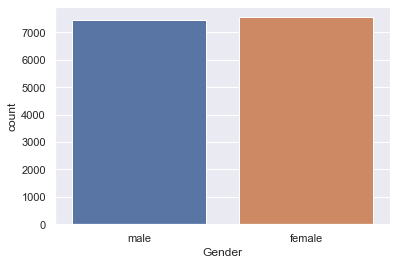

In [34]:
#DATA ANALYSIS OF GENDER USING COUNT PLOT
sns.countplot(calories_data['Gender'])#SHOWS EQUAL DISTRIBUTION OF MALE AND FEMALE AS THE DATA POINTS ARE SIMILIAR (COUNTPLOT IS USED ONLY FOR ONLY CATEGORICAL DATA)

c:\users\hp-kle\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

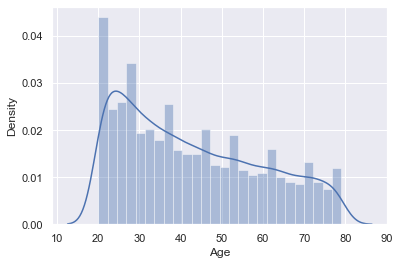

In [35]:
#DATA ANALYSIS OF AGE USING DISTRIBUTION PLOT 
sns.distplot(calories_data['Age'])#BASED ON THE DISTRIBUTION PLOT MORE VALUES IN THE RANGE BETWEEN 20-30 AGE RANGE 

c:\users\hp-kle\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Height', ylabel='Density'>

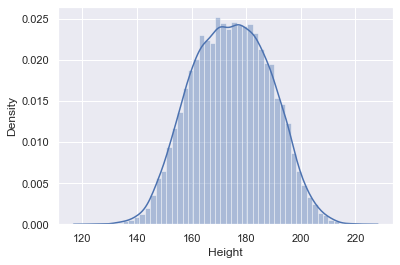

In [36]:
#DATA ANALYSIS OF HEIGHT USING DISTRIBUTION PLOT 
sns.distplot(calories_data['Height'])#NORMAL DISTRIBUTION

c:\users\hp-kle\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Weight', ylabel='Density'>

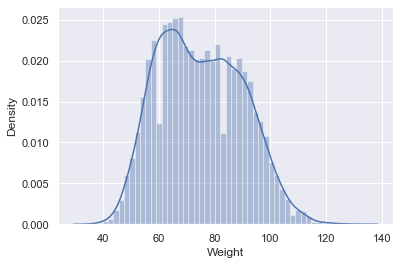

In [37]:
#DATA ANALYSIS OF WEIGHT USING DISTRIBUTION PLOT 
sns.distplot(calories_data['Weight'])

c:\users\hp-kle\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Duration', ylabel='Density'>

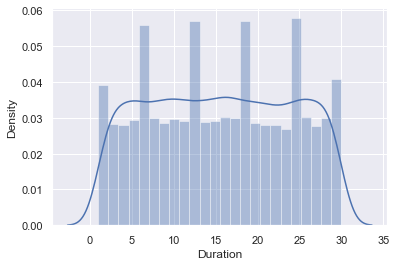

In [38]:
#DATA ANALYSIS OF DURATION USING DISTRIBUTION PLOT 
sns.distplot(calories_data['Duration'])

c:\users\hp-kle\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Heart_Rate', ylabel='Density'>

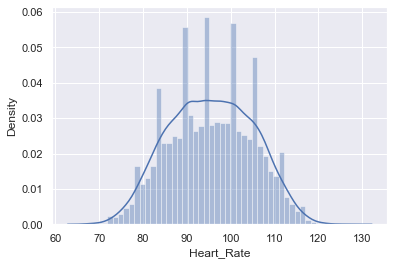

In [39]:
#DATA ANALYSIS OF HEART RATE USING DISTRIBUTION PLOT 
sns.distplot(calories_data['Heart_Rate'])

c:\users\hp-kle\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Body_Temp', ylabel='Density'>

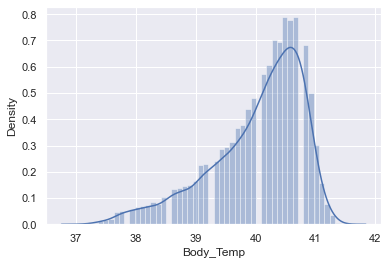

In [40]:
#DATA ANALYSIS OF BODY TEMPERATURE USING DISTRIBUTION PLOT 
sns.distplot(calories_data['Body_Temp'])

c:\users\hp-kle\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Calories', ylabel='Density'>

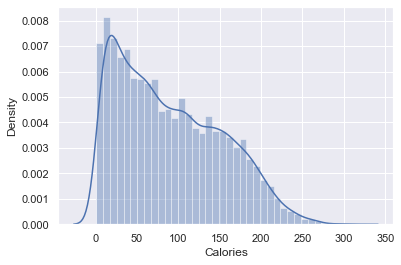

In [41]:
#DATA ANALYSIS OF CALORIES USING DISTRIBUTION PLOT 
sns.distplot(calories_data['Calories'])

In [47]:
#FINDING THE CORRELATION BETWEEN THE DATA
correlation = calories_data.corr()

<AxesSubplot:>

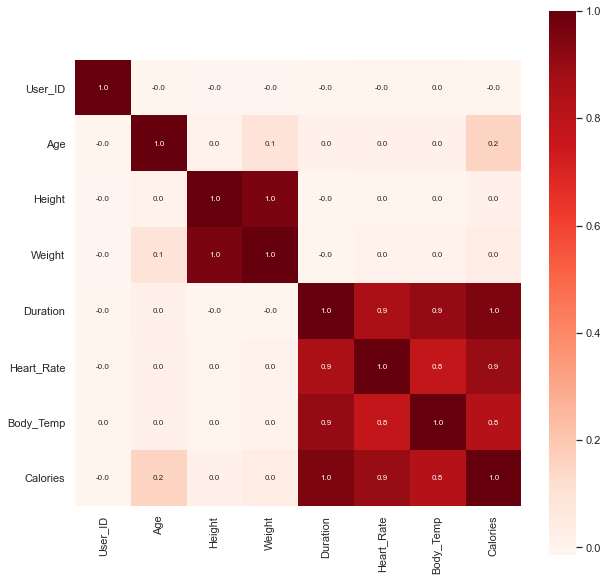

In [55]:
#CONSTRUCTING A HEATMAP TO UNDERSTAND CORRELATION
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Reds')
# ACCORDING TO THE HEAT MAP THE FIELDS Duration Heart_Rate AND Body_Temp ARE POSITIVELY CORRELATED WITH CALORIES VALUE.
#THE Height AND Weight ARE POSITIVELY CORRELATED.
#MEANING THE DATA ARE DIRECTLY PROPOTIONAL TO EACH OTHER.

In [59]:
#CONVERTING THE GENDER FEILD IN THE DATASET FROM TEXT TO NUMERICAL VALUES.
calories_data.replace({"Gender":{'male':0,'female':1}}, inplace=True)
calories_data
#GENDER IS CONVERTED TO NUMERICAL VALUES

User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  \
0      14733363       0   68   190.0    94.0      29.0       105.0       40.8   
1      14861698       1   20   166.0    60.0      14.0        94.0       40.3   
2      11179863       0   69   179.0    79.0       5.0        88.0       38.7   
3      16180408       1   34   179.0    71.0      13.0       100.0       40.5   
4      17771927       1   27   154.0    58.0      10.0        81.0       39.8   
...         ...     ...  ...     ...     ...       ...         ...        ...   
14995  15644082       1   20   193.0    86.0      11.0        92.0       40.4   
14996  17212577       1   27   165.0    65.0       6.0        85.0       39.2   
14997  17271188       1   43   159.0    58.0      16.0        90.0       40.1   
14998  18643037       0   78   193.0    97.0       2.0        84.0       38.3   
14999  11751526       0   63   173.0    79.0      18.0        92.0       40.5   

       Calories  
0         231.0  
1          66.0  
2          26.0  
3          71.0  
4          35.0  
...         ...  
14995      45.0  
14996      23.0  
14997      75.0  
14998      11.0  
14999      98.0  

[15000 rows x 9 columns]

In [61]:
#ALL THE COLOUMNS ARE KNOW AS FEAUTURES.
#THE CALORIES FEILD IS CALLED TARGET.
#SEPERATING FEATURES AND TARGETS BEFORE TRAINING
X = calories_data.drop(columns=['User_ID', 'Calories'])
Y = calories_data['Calories']

In [62]:
print(X)#User_ID and Calories Dropped.

       Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0           0   68   190.0    94.0      29.0       105.0       40.8
1           1   20   166.0    60.0      14.0        94.0       40.3
2           0   69   179.0    79.0       5.0        88.0       38.7
3           1   34   179.0    71.0      13.0       100.0       40.5
4           1   27   154.0    58.0      10.0        81.0       39.8
...       ...  ...     ...     ...       ...         ...        ...
14995       1   20   193.0    86.0      11.0        92.0       40.4
14996       1   27   165.0    65.0       6.0        85.0       39.2
14997       1   43   159.0    58.0      16.0        90.0       40.1
14998       0   78   193.0    97.0       2.0        84.0       38.3
14999       0   63   173.0    79.0      18.0        92.0       40.5

[15000 rows x 7 columns]


In [63]:
print(Y)

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64


In [67]:
#SPLITTING DATA IN TRAINING DATA AND TEST DATA
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2) #20% TESTING DATA 80% TRAINING DATA


In [68]:
print(X.shape,X_train.shape,X_test.shape)
#TRAINING DATA IS 12000 AND TESTING DATA IS 3000,THERFORE TOTAL DATA IS 15000.

(15000, 7) (12000, 7) (3000, 7)


In [69]:
#MODEL TRAINING USING XGBoost Regressor
model = XGBRegressor() #LOADING THE MODEL


In [70]:
model.fit(X_train, Y_train)# MODEL TRAINING WHEN THIS DATA IS GIVEN TO XGBoost Regressor,IT FINDS THE PATTERN BETWEEN THE DATA 

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [71]:
#MODEL IS TRAINED NOW EVALUATION OF MODEL BASED ON TEST DATA
#PREDICTION ON TEST DATA
test_data_prediction = model.predict(X_test)

In [72]:
print(test_data_prediction)
#VALUES PREDICTED BY OUR MODEL

[127.823784 226.00154   38.66253  ... 144.3636    22.767195  89.87375 ]


In [73]:
#COMPARING VALUES PREDICTED BY OUR MODEL VS ORIGINAL VALUES(Y_test)
#MEAN ABSOLUTE ERROR METRICS(MAGNITUDE OF ERROR OUR MODEL IS MAKING COMPARED TO ORIGINAL DATA)
mae = metrics.mean_absolute_error(Y_test, test_data_prediction)

In [74]:
print("MEAN ABSOLUTE ERROR=", mae)#GOOD SCORE AS THE MAGNITUDE OF ERROR IS LESS

MEAN ABSOLUTE ERROR= 1.4807048829992613


In [75]:
print(Y_test)

7592     127.0
3551     224.0
9698      38.0
3759       6.0
2353     137.0
         ...  
8859     177.0
2886      49.0
14357    145.0
9430      24.0
11870     90.0
Name: Calories, Length: 3000, dtype: float64
